In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil


In [2]:
steam_data = pd.read_csv('final-project-data-combined.csv')

In [3]:
steam_data.head()

,App Id,Name,Developers,Publishers,Metascores,Owners,Genres,Tags,Price
0,7,Steam Client,NaN,NaN,NaN,"0Â ..Â 20,000",[''],NaN,$0.00
1,8,winui2,NaN,NaN,NaN,"0Â ..Â 20,000",[''],NaN,$0.00
2,10,Counter-Strike,Valve,Valve,88%,"10,000,000Â ..Â 20,000,000",['Action'],"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",$9.99
3,20,Team Fortress Classic,Valve,Valve,NaN,"2,000,000Â ..Â 5,000,000",['Action'],"['Action', 'FPS', 'Multiplayer', 'Classic', 'H...",$4.99
4,30,Day of Defeat,Valve,Valve,79%,"5,000,000Â ..Â 10,000,000",['Action'],"['FPS', 'World War II', 'Multiplayer', 'Shoote...",$4.99


In [4]:
#steam_data["Genres"] = 
steam_data['clean_genres']=steam_data["Genres"].str.replace(' ','_').str.replace(',_', ',')

In [5]:
steam_data[steam_data['clean_genres'].str.contains('Free')==True]

,App Id,Name,Developers,Publishers,Metascores,Owners,Genres,Tags,Price,clean_genres
36,440,Team Fortress 2,Valve,Valve,92%,"50,000,000Â ..Â 100,000,000","['Action', 'Free to Play']","['Free to Play', 'Hero Shooter', 'Multiplayer'...",$0.00,"['Action','Free_to_Play']"
53,570,Dota 2,Valve,Valve,90%,"100,000,000Â ..Â 200,000,000","['Action', 'Free to Play', 'Strategy']","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",$0.00,"['Action','Free_to_Play','Strategy']"
77,730,Counter-Strike: Global Offensive,Valve,Valve,83%,"100,000,000Â ..Â 200,000,000","['Action', 'Free to Play']","['FPS', 'Shooter', 'Multiplayer', 'Competitive...",$0.00,"['Action','Free_to_Play']"
1431,6370,Bloodline Champions,Stunlock Studios,Stunlock Studios,79%,"500,000Â ..Â 1,000,000","['Action', 'Free to Play', 'Massively Multipla...","['Free to Play', 'Action', 'MOBA', 'Multiplaye...",$0.00,"['Action','Free_to_Play','Massively_Multiplayer']"
1563,8500,EVE Online,CCP,CCP,88%,"2,000,000Â ..Â 5,000,000","['Action', 'Free to Play', 'Massively Multipla...","['Space', 'Massively Multiplayer', 'Sci-fi', '...",$0.00,"['Action','Free_to_Play','Massively_Multiplaye..."
...,...,...,...,...,...,...,...,...,...,...
95012,1463920,hexceed,ToastieLabs,ToastieLabs,NaN,"0Â ..Â 20,000","['Casual', 'Free to Play', 'Indie']",NaN,$0.00,"['Casual','Free_to_Play','Indie']"
95058,1465240,å¤©å¨ä¼ è¯´-å‚²è§†ç‹‚åˆ€,å¤©å¨ä¼ è¯´,å¤©å¨ä¼ è¯´,NaN,"0Â ..Â 20,000","['Casual', 'Free to Play', 'Massively Multipla...",NaN,$0.00,"['Casual','Free_to_Play','Massively_Multiplaye..."
95077,1465860,*NEW* SCUFFED EPIC BHOP SIMULATOR 2023 (POG CH...,Chris Shanaz,Octo Gaming,NaN,"0Â ..Â 20,000","['Casual', 'Free to Play']",NaN,$0.00,"['Casual','Free_to_Play']"
95090,1466660,Project Space Hunter,BigBotNetwork,BigBotNetwork,NaN,"0Â ..Â 20,000","['Action', 'Free to Play', 'Early Access']",NaN,$0.00,"['Action','Free_to_Play','Early_Access']"


In [7]:
len(steam_data)

95244

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
genres=steam_data['clean_genres'].dropna().str.replace("'", '').str.replace('[', '').str.replace(']', '')
count_vec=CountVectorizer()
encoded=count_vec.fit_transform(genres)
count_vec.vocabulary_

{'action': 5,
 'indie': 19,
 'free_to_play': 15,
 'strategy': 31,
 'adventure': 6,
 'rpg': 25,
 'racing': 24,
 'casual': 9,
 'simulation': 28,
 'animation_': 7,
 '_modeling': 3,
 'video_production': 34,
 'massively_multiplayer': 20,
 'sports': 30,
 'early_access': 12,
 'in_early_access': 18,
 'photo_editing': 23,
 'utilities': 33,
 'design_': 10,
 '_illustration': 2,
 'education': 13,
 'game_development': 16,
 'software_training': 29,
 'web_publishing': 36,
 'violent': 35,
 'gore': 17,
 'audio_production': 8,
 'accounting': 4,
 'nudity': 22,
 'sexual_content': 26,
 'documentary': 11,
 'episodic': 14,
 'movie': 21,
 'short': 27,
 'tutorial': 32,
 '360_video': 1,
 '360_v': 0}

In [9]:
encoded_genres= pd.DataFrame(encoded.toarray(), columns=count_vec.vocabulary_)
encoded_genres

,action,indie,free_to_play,strategy,adventure,rpg,racing,casual,simulation,animation_,...,accounting,nudity,sexual_content,documentary,episodic,movie,short,tutorial,360_video,360_v
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95221,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
95222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
term_count=zip(encoded.toarray().sum(axis=0), count_vec.get_feature_names())
sorted_term_count=sorted(list(term_count), reverse=True)
sorted_term_count

[(45293, 'indie'),
 (31204, 'action'),
 (23926, 'adventure'),
 (23602, 'casual'),
 (16674, 'simulation'),
 (15878, 'strategy'),
 (14713, 'rpg'),
 (6727, 'free_to_play'),
 (5113, 'early_access'),
 (3676, 'sports'),
 (3206, 'massively_multiplayer'),
 (2861, 'racing'),
 (2616, 'in_early_access'),
 (1393, 'design_'),
 (1393, '_illustration'),
 (1381, 'violent'),
 (1168, 'movie'),
 (1024, 'web_publishing'),
 (973, 'utilities'),
 (737, 'gore'),
 (610, 'animation_'),
 (610, '_modeling'),
 (536, 'sexual_content'),
 (534, 'nudity'),
 (501, 'education'),
 (430, 'video_production'),
 (371, 'audio_production'),
 (351, 'software_training'),
 (264, 'episodic'),
 (246, 'photo_editing'),
 (223, 'game_development'),
 (98, 'documentary'),
 (96, 'tutorial'),
 (43, 'short'),
 (21, 'accounting'),
 (20, '360_video'),
 (1, '360_v')]

In [11]:
steam_data['clean_tags']=steam_data["Tags"].str.replace(' ','_').str.replace(',_', ',')
steam_data
from sklearn.feature_extraction.text import CountVectorizer
tags=steam_data['clean_tags'].dropna().str.replace("'", '').str.replace('[', '').str.replace(']', '')
count_vec=CountVectorizer()
encoded_tags=count_vec.fit_transform(tags)
count_vec.vocabulary_

{'action': 19,
 'fps': 165,
 'multiplayer': 254,
 'shooter': 346,
 'classic': 88,
 'team': 392,
 'based': 48,
 'first': 159,
 'person': 287,
 'competitive': 99,
 'tactical': 389,
 '1990s': 1,
 'sports': 372,
 'pvp': 311,
 'old_school': 272,
 'military': 240,
 'strategy': 378,
 'survival': 385,
 'score_attack': 342,
 '1980s': 0,
 'assassin': 37,
 'violent': 428,
 'hero_shooter': 189,
 'class': 87,
 'co': 90,
 'op': 275,
 'fast': 154,
 'paced': 281,
 'retro': 323,
 'online_co': 274,
 'mod': 247,
 'remake': 320,
 'funny': 168,
 'world_war_ii': 444,
 'war': 435,
 'historical': 192,
 'singleplayer': 351,
 'difficult': 123,
 'world_war_i': 443,
 'arena_shooter': 35,
 'sci': 340,
 'fi': 157,
 'gore': 177,
 'aliens': 26,
 'adventure': 24,
 'atmospheric': 40,
 'story_rich': 377,
 'silent_protagonist': 349,
 'great_soundtrack': 180,
 'puzzle': 309,
 'moddable': 248,
 'cyberpunk': 111,
 'space': 366,
 'memes': 238,
 'conspiracy': 100,
 'psychological_horror': 308,
 'platformer': 296,
 '3d': 6,
 '

In [12]:
encoded_tags= pd.DataFrame(encoded_tags.toarray(), columns=count_vec.vocabulary_)
encoded_tags

,action,fps,multiplayer,shooter,classic,team,based,first,person,competitive,...,bmx,auto_battler,360_video,electronic,faith,instrumental_music,breathtaking,bit_music,rock_music,cooking
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56630,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
56631,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56632,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56633,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
encoded_merge = encoded_tags.merge(encoded_genres,left_index=True, right_index=True)
encoded_merge

,action_x,fps,multiplayer,shooter,classic,team,based,first,person,competitive,...,accounting,nudity_y,sexual_content_y,documentary_y,episodic_y,movie_y,short_y,tutorial_y,360_video_y,360_v
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56630,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
56631,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
56632,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56633,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
new = steam_data["Owners"].str.split("Â ..Â ", n = 1, expand = True)
steam_data['Owners'].dtypes
new

,0,1
0,0,"20,000"
1,0,"20,000"
2,"10,000,000","20,000,000"
3,"2,000,000","5,000,000"
4,"5,000,000","10,000,000"
...,...,...
95239,0,"20,000"
95240,0,"20,000"
95241,0,"20,000"
95242,0,"20,000"


In [14]:
steam_data["min owners"] = new[0]
steam_data["max owners"] = new[1]
steam_data.drop(columns =["Owners"], inplace = True) 

In [15]:
steam_data

,App Id,Name,Developers,Publishers,Metascores,Genres,Tags,Price,clean_genres,clean_tags,min owners,max owners
0,7,Steam Client,NaN,NaN,NaN,[''],NaN,$0.00,[''],NaN,0,"20,000"
1,8,winui2,NaN,NaN,NaN,[''],NaN,$0.00,[''],NaN,0,"20,000"
2,10,Counter-Strike,Valve,Valve,88%,['Action'],"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",$9.99,['Action'],"['Action','FPS','Multiplayer','Shooter','Class...","10,000,000","20,000,000"
3,20,Team Fortress Classic,Valve,Valve,NaN,['Action'],"['Action', 'FPS', 'Multiplayer', 'Classic', 'H...",$4.99,['Action'],"['Action','FPS','Multiplayer','Classic','Hero_...","2,000,000","5,000,000"
4,30,Day of Defeat,Valve,Valve,79%,['Action'],"['FPS', 'World War II', 'Multiplayer', 'Shoote...",$4.99,['Action'],"['FPS','World_War_II','Multiplayer','Shooter',...","5,000,000","10,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
95239,1474820,The Tower Of TigerQiuQiu Tiger Tank 60,TigerQiuQiu,TigerQiuQiu,NaN,"['Action', 'Casual', 'Indie']",NaN,$0.74,"['Action','Casual','Indie']",NaN,0,"20,000"
95240,1474960,Der Geisterturm / The Ghost Tower Demo,Graverobber Foundation,Graverobber Foundation,NaN,[''],NaN,$0.00,[''],NaN,0,"20,000"
95241,1475910,DIY Simulator Dedicated Server,NaN,NaN,NaN,[''],NaN,$0.00,[''],NaN,0,"20,000"
95242,1476030,OTTI'S QUEST,NaN,NaN,NaN,[''],NaN,$0.00,[''],NaN,0,"20,000"


In [ ]:
# new_max = steam_data["max"].str.split(".", n = 1, expand = True)
# new_max[1]

In [ ]:
# steam_data["max"] = new_max[1]
# steam_data

In [ ]:
#  steam_data["Genres"] = steam_data["Genres"].apply(eval)

In [16]:
steam_data_clean = steam_data.dropna(subset=["Genres", "Developers","Tags","Metascores", "max owners", "min owners","clean_genres","clean_tags"])

In [17]:
steam_data_clean.shape

(4005, 12)

In [18]:
steam_data_clean.isna().sum()

App Id           0
Name             0
Developers       0
Publishers      61
Metascores       0
Genres           0
Tags             0
Price            0
clean_genres     0
clean_tags       0
min owners       0
max owners       0
dtype: int64

In [19]:
steam_data_clean["min owners"] = pd.Series(steam_data_clean["min owners"]).str.replace(',', "")
steam_data_clean.head()
steam_data_clean["max owners"] = pd.Series(steam_data_clean["max owners"]).str.replace(',', "")
steam_data_clean

<ipython-input-19-36045a58e141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_data_clean["min owners"] = pd.Series(steam_data_clean["min owners"]).str.replace(',', "")
<ipython-input-19-36045a58e141>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_data_clean["max owners"] = pd.Series(steam_data_clean["max owners"]).str.replace(',', "")


,App Id,Name,Developers,Publishers,Metascores,Genres,Tags,Price,clean_genres,clean_tags,min owners,max owners
2,10,Counter-Strike,Valve,Valve,88%,['Action'],"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",$9.99,['Action'],"['Action','FPS','Multiplayer','Shooter','Class...",10000000,20000000
4,30,Day of Defeat,Valve,Valve,79%,['Action'],"['FPS', 'World War II', 'Multiplayer', 'Shoote...",$4.99,['Action'],"['FPS','World_War_II','Multiplayer','Shooter',...",5000000,10000000
8,70,Half-Life,Valve,Valve,96%,['Action'],"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",$9.99,['Action'],"['FPS','Classic','Action','Sci-fi','Singleplay...",5000000,10000000
9,80,Counter-Strike: Condition Zero,Valve,Valve,65%,['Action'],"['Action', 'FPS', 'Shooter', 'Multiplayer', 'F...",$9.99,['Action'],"['Action','FPS','Shooter','Multiplayer','First...",5000000,10000000
12,100,Counter-Strike: Condition Zero,Valve,Valve,65%,['Action'],"['Action', 'FPS', 'Shooter', 'Multiplayer', 'F...",$9.99,['Action'],"['Action','FPS','Shooter','Multiplayer','First...",10000000,20000000
...,...,...,...,...,...,...,...,...,...,...,...,...
83966,1286830,STAR WARS: The Old Republic,BioWare,Electronic Arts,85%,"['Free to Play', 'Massively Multiplayer', 'RPG']","['Free to Play', 'MMORPG', 'Multiplayer', 'RPG...",$0.00,"['Free_to_Play','Massively_Multiplayer','RPG']","['Free_to_Play','MMORPG','Multiplayer','RPG','...",1000000,2000000
85672,1311510,Embracelet,Mattis Folkestad,machineboy,86%,"['Adventure', 'Indie']","['Adventure', 'Indie', 'Story Rich', 'Music', ...",$12.99,"['Adventure','Indie']","['Adventure','Indie','Story_Rich','Music','Exp...",0,20000
86889,1328660,Need for Speed Hot Pursuit Remastered,Stellar Entertainment Limited,Electronic Arts,74%,"['Action', 'Racing']","['Combat Racing', 'Racing', 'Open World', 'Dri...",$29.99,"['Action','Racing']","['Combat_Racing','Racing','Open_World','Drivin...",0,20000
87795,1342620,Werewolf: The Apocalypse â€” Heart of the Forest,Different Tales,Walkabout,78%,"['Adventure', 'Indie', 'RPG']","['Werewolves', 'Visual Novel', 'RPG', 'Psychol...",$14.99,"['Adventure','Indie','RPG']","['Werewolves','Visual_Novel','RPG','Psychologi...",200000,500000


In [20]:
steam_data_clean['max owners'] = steam_data_clean['max owners'].astype(int)

<ipython-input-20-4195f6c63870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_data_clean['max owners'] = steam_data_clean['max owners'].astype(int)


In [21]:
steam_data_clean.loc[steam_data_clean["max owners"]>= 200000.0, "Hit"] = 1
steam_data_clean.loc[steam_data_clean["max owners"]< 200000.0, "Hit"] = 0

C:\Users\Badison\.conda\New folder\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Badison\.conda\New folder\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
steam_data_clean_2 = pd.DataFrame(steam_data_clean, columns = ['App Id', 'Name','Developers', 'Publishers', 'Metascores', 'Price','clean_genres','clean_tags','Hit'])

In [23]:
steam_data_clean_2

,App Id,Name,Developers,Publishers,Metascores,Price,clean_genres,clean_tags,Hit
2,10,Counter-Strike,Valve,Valve,88%,$9.99,['Action'],"['Action','FPS','Multiplayer','Shooter','Class...",1.0
4,30,Day of Defeat,Valve,Valve,79%,$4.99,['Action'],"['FPS','World_War_II','Multiplayer','Shooter',...",1.0
8,70,Half-Life,Valve,Valve,96%,$9.99,['Action'],"['FPS','Classic','Action','Sci-fi','Singleplay...",1.0
9,80,Counter-Strike: Condition Zero,Valve,Valve,65%,$9.99,['Action'],"['Action','FPS','Shooter','Multiplayer','First...",1.0
12,100,Counter-Strike: Condition Zero,Valve,Valve,65%,$9.99,['Action'],"['Action','FPS','Shooter','Multiplayer','First...",1.0
...,...,...,...,...,...,...,...,...,...
83966,1286830,STAR WARS: The Old Republic,BioWare,Electronic Arts,85%,$0.00,"['Free_to_Play','Massively_Multiplayer','RPG']","['Free_to_Play','MMORPG','Multiplayer','RPG','...",1.0
85672,1311510,Embracelet,Mattis Folkestad,machineboy,86%,$12.99,"['Adventure','Indie']","['Adventure','Indie','Story_Rich','Music','Exp...",0.0
86889,1328660,Need for Speed Hot Pursuit Remastered,Stellar Entertainment Limited,Electronic Arts,74%,$29.99,"['Action','Racing']","['Combat_Racing','Racing','Open_World','Drivin...",0.0
87795,1342620,Werewolf: The Apocalypse â€” Heart of the Forest,Different Tales,Walkabout,78%,$14.99,"['Adventure','Indie','RPG']","['Werewolves','Visual_Novel','RPG','Psychologi...",1.0


In [27]:
mergedf = steam_data_clean_2.merge(encoded_merge, left_index=True, right_index=True)
mergedf

,App Id,Name,Developers,Publishers,Metascores,Price,clean_genres,clean_tags,Hit,action_x,...,accounting,nudity_y,sexual_content_y,documentary_y,episodic_y,movie_y,short_y,tutorial_y,360_video_y,360_v
2,10,Counter-Strike,Valve,Valve,88%,$9.99,['Action'],"['Action','FPS','Multiplayer','Shooter','Class...",1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,Day of Defeat,Valve,Valve,79%,$4.99,['Action'],"['FPS','World_War_II','Multiplayer','Shooter',...",1.0,0,...,0,0,0,0,0,0,0,0,0,0
8,70,Half-Life,Valve,Valve,96%,$9.99,['Action'],"['FPS','Classic','Action','Sci-fi','Singleplay...",1.0,0,...,0,0,0,0,0,0,0,0,0,0
9,80,Counter-Strike: Condition Zero,Valve,Valve,65%,$9.99,['Action'],"['Action','FPS','Shooter','Multiplayer','First...",1.0,0,...,0,0,0,0,0,0,0,0,0,0
12,100,Counter-Strike: Condition Zero,Valve,Valve,65%,$9.99,['Action'],"['Action','FPS','Shooter','Multiplayer','First...",1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56390,785740,This Is the Police 2,Weappy Studio,THQ Nordic,66%,$14.99,"['Adventure','Indie','Strategy']","['Strategy','Singleplayer','Story_Rich','Turn-...",1.0,0,...,0,1,0,0,1,0,0,0,0,0
56395,785790,WHAT THE GOLF?,Triband,Triband,83%,$19.99,"['Action','Adventure','Casual','Indie','Simula...","['Memes','Level_Editor','Comedy','Physics','In...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
56453,786580,Gleaner Heights,Emilios Manolidis,Emilios Manolidis,65%,$9.99,"['Action','Adventure','Casual','Indie','RPG','...","['Farming_Sim','RPG','Indie','Simulation','Adv...",0.0,0,...,0,1,0,1,0,0,0,0,0,0
56523,787480,Phoenix Wright: Ace Attorney Trilogy,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",80%,$29.99,['Adventure'],"['Visual_Novel','Detective','Story_Rich','Grea...",1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
steam_data_clean.to_csv('mergedf.csv', index = False, header=True)

In [ ]:
# steam_data_clean["Genres"] = steam_data_clean["Genres"].replace("'","")

In [ ]:
# steam_data_clean.head()

In [ ]:
# stripped_genres = []

# for i in steam_data_clean["Genres"]:
#     x = i.replace("'","")
#     stripped_genres.append(x)
    
# len(stripped_genres)

In [ ]:
# stripped_genres

In [ ]:
# steam_data_clean["Genres"] = stripped_genres

In [ ]:
# steam_data_clean.head()

In [ ]:
# steam_data.head()

In [ ]:
# steam_data_clean["Genres"] = steam_data_clean["Genres"].apply(eval)

In [ ]:
# genre_dict = {}
# for i in steam_data_clean["Genres"]:
#     for j in i:
#         if j not in genre_dict:
#             genre_dict[j] = 1
#         else:
#             genre_dict[j] += 1
# genre_dict

In [ ]:
# genre_explode = steam_data_clean.explode("Genres")
# genre_explode

In [ ]:
# steam_data_clean.head()

In [ ]:
# len(steam_data_clean["Genres"].iloc[0].replace("[", "").replace("]", "").split(","))

In [ ]:
# i = 3
# stored_data = []
# genre_series = []

# #for i in range(5):
# if len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 1:
#     stored_data.append(steam_data_clean.iloc[i, :])
#     genre_series.append(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")[0])
# elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 2:
#     genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#     genre_series.append(genre_list[0])
#     genre_series.append(genre_list[1])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
# elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 3:
#     genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#     genre_series.append(genre_list[0])
#     genre_series.append(genre_list[1])
#     genre_series.append(genre_list[2])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
# elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 4:
#     genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#     genre_series.append(genre_list[0])
#     genre_series.append(genre_list[1])
#     genre_series.append(genre_list[2])
#     genre_series.append(genre_list[3])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
# elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 5:
#     genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#     genre_series.append(genre_list[0])
#     genre_series.append(genre_list[1])
#     genre_series.append(genre_list[2])
#     genre_series.append(genre_list[3])
#     genre_series.append(genre_list[4])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
#     stored_data.append(steam_data_clean.iloc[i, :])
    

In [ ]:
# stored_data

In [ ]:
# test = pd.DataFrame(stored_data)

# test

In [ ]:
# genre_series

In [ ]:
# # create new dataframe where every column is the same EXCEPT the genres. if there is a game with 2 genres, make 2 rows where 
# # column is the same except for the genre.

# stored_data = []
# genre_series = []

# for i in range(steam_data_clean.shape[0]):
#     if len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 1:
#         stored_data.append(steam_data_clean.iloc[i, :])
#         genre_series.append(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")[0])
#     elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 2:
#         genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#     elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 3:
#         genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         genre_series.append(genre_list[2])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#     elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 4:
#         genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         genre_series.append(genre_list[2])
#         genre_series.append(genre_list[3])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#     elif len(steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")) == 5:
#         genre_list = steam_data_clean["Genres"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         genre_series.append(genre_list[2])
#         genre_series.append(genre_list[3])
#         genre_series.append(genre_list[4])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])





In [ ]:
# genre_df = pd.DataFrame(stored_data)

# genre_df.head(10)

In [ ]:
# genre_df["Genres"] = genre_series

# genre_df.head()

In [ ]:
# # # create new dataframe where every column is the same EXCEPT the genres. if there is a game with 2 genres, make 2 rows where 
# # # column is the same except for the genre.

# stored_data_tags = []
# Tags_series = []

# for i in range(genre_explode.shape[0]):
#     if len(steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")) == 1:
#         stored_data_tags.append(steam_data_clean.iloc[i, :])
#         genre_series.append(steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")[0])
#     elif len(steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")) == 2:
#         genre_list = steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#     elif len(steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")) == 3:
#         genre_list = steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         genre_series.append(genre_list[2])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#     elif len(steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")) == 4:
#         genre_list = steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         genre_series.append(genre_list[2])
#         genre_series.append(genre_list[3])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#     elif len(steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")) == 5:
#         genre_list = steam_data_clean["Tags"].iloc[i].replace("[", "").replace("]", "").split(",")
#         genre_series.append(genre_list[0])
#         genre_series.append(genre_list[1])
#         genre_series.append(genre_list[2])
#         genre_series.append(genre_list[3])
#         genre_series.append(genre_list[4])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])
#         stored_data.append(steam_data_clean.iloc[i, :])


In [ ]:
# genre_explode["Tags"] = genre_explode["Tags"].apply(eval)

In [ ]:
# tag_dict = {}
# for i in genre_explode["Tags"]:
#     for j in i:
#         if j not in tag_dict:
#             tag_dict[j] = 1
#         else:
#             tag_dict[j] += 1
# tag_dict

In [ ]:
# tag_explode = genre_explode.explode("Tags")
# tag_explode

In [ ]:
# tag_explode['max owners'] = tag_explode['max owners'].replace(",","")
# # tag_explode.dtypes
# tag_explode.head()

In [ ]:
# x = tag_explode["max owners"].iloc[0]

In [ ]:
# x.replace(",", "")

In [ ]:
# tag_explode["max owners"] = pd.Series(tag_explode["max owners"]).str.replace(',', "")
# tag_explode.head()

In [ ]:
# tag_explode["min owners"] = pd.Series(tag_explode["min owners"]).str.replace(',', "")
# tag_explode.head()

In [ ]:
# tag_explode

In [ ]:
# own_med = tag_explode["max owners"].median()
# own_med
# own_max = tag_explode["max owners"].max()
# own_max
# own_med

In [ ]:
# tag_explode['max owners'] = tag_explode['max owners'].astype(int)

In [ ]:
# tag_explode.loc[tag_explode["max owners"]>= 200000.0, "Hit"] = 1
# tag_explode.loc[tag_explode["max owners"]< 200000.0, "Hit"] = 0


In [ ]:
# tag_explode

In [ ]:
# tag_explode.to_csv('final_project_hits.csv', index = False, header=True)


KeyError: "['encoded_genres'] not in index"

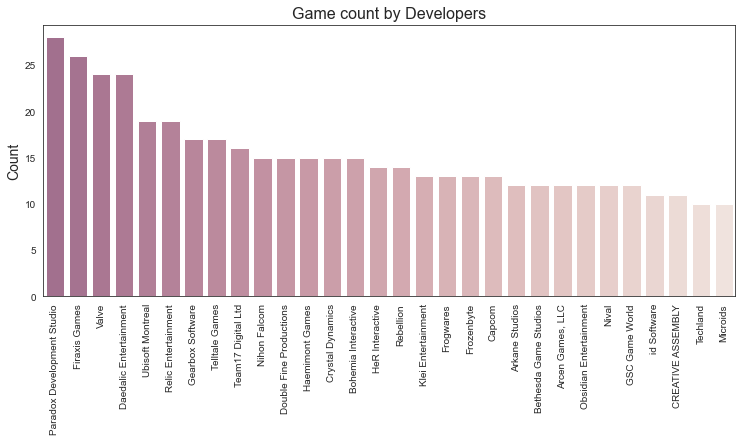

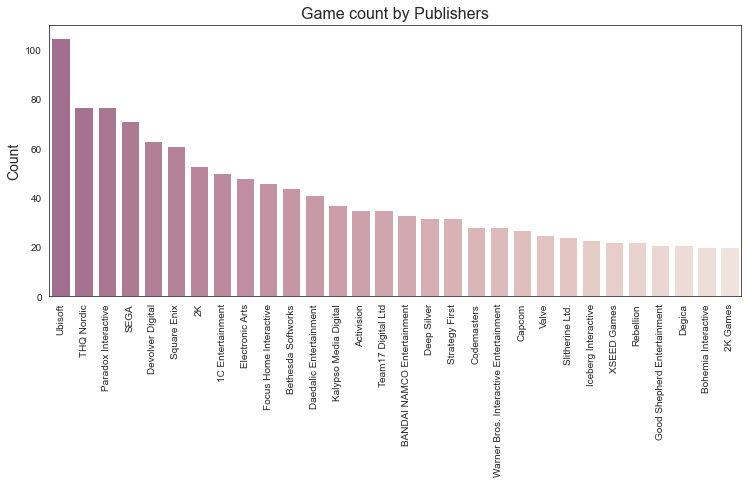

In [30]:
cols = ['Developers', 'Publishers', 'encoded_genres','encoded_tags']

for col in cols:
    chart = mergedf[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'clean_genres' else 30), dark=0.5, light=.90, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

In [ ]:
heatmap1_data = pd.pivot_table(steam_data_clean, values='max owners', 
                     index=['clean_genres'], 
                     columns='Price')

In [ ]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [ ]:
heatmap2_data = pd.pivot_table(tag_explode, values='max owners', 
                     index=['Genres'], 
                     columns='Metascores')

In [ ]:
sns.heatmap(heatmap2_data, cmap="YlGnBu")

In [ ]:
heatmap3_data = pd.pivot_table(tag_explode, values='max owners', 
                     index=['Tags'], 
                     columns='Metascores')

In [ ]:
sns.heatmap(heatmap3_data, cmap="YlGnBu")